In [5]:
from pyunpack import Archive
Archive('C:/Users/Christina/Downloads/normal.rar').extractall('E:/Christina/Sample_Data/onh_Mokhtary')

PatoolError: patool can not unpack
patool error: error extracting C:\Users\Christina\Downloads\normal.rar: could not find an executable program to extract format rar; candidates are (rar,unrar,7z),

In [7]:
import rarfile

rf = rarfile.RarFile("C:/Users/Christina/Downloads/normal.rar")
for f in rf.infolist():
    print(f.filename, f.file_size)
    if f.filename == "README":
        print(rf.read(f))


normal/2_od.mat 9441743
normal/2_os.mat 9367927
normal/3_os.mat 9045864
normal/3_od.mat 8537782
normal/4_od.mat 9919662
normal/4_os.mat 10264944
normal/5_od.mat 9460764
normal/5_os.mat 9210971
normal/6_od.mat 8502201
normal/6_os.mat 8263531
normal/7_os.mat 9304614
normal/7_od.mat 9353919
normal/1_od.mat 9468082
normal/1_os.mat 9423830
normal/ 0


In [9]:
from zipfile import ZipFile

z = rarfile.RarFile("C:/Users/Christina/Downloads/normal.rar", 'r')
z.extractall('E:/Christina/Sample_Data/onh_Mokhtary')
z.close()


In [70]:
import scipy.io as sio

# Load the .mat file
data = sio.loadmat('E:/Christina/Sample_Data/onh_Mokhtary/1p/1p.mat')


In [71]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Oct 30 12:32:36 2011',
 '__version__': '1.0',
 '__globals__': [],
 'd5': array([[[70, 57, 21, ..., 58, 57, 56],
         [67, 58, 59, ..., 72, 55, 66],
         [70, 58, 55, ..., 57, 53, 63],
         ...,
         [ 0, 61, 44, ..., 66, 51, 25],
         [ 0, 60, 53, ..., 52, 54, 44],
         [ 0, 52, 63, ..., 68, 70, 58]],
 
        [[ 5, 50, 64, ..., 56, 58, 58],
         [64, 64, 63, ..., 60, 68, 48],
         [59, 53, 34, ..., 43, 57, 73],
         ...,
         [51, 69, 70, ..., 53, 47, 39],
         [18, 64, 46, ..., 64, 59, 70],
         [53, 62, 53, ..., 69, 36, 58]],
 
        [[64, 49, 63, ..., 59, 74, 43],
         [78, 60, 55, ..., 61, 55, 50],
         [51, 45, 63, ..., 50, 61, 58],
         ...,
         [59, 44, 51, ..., 49, 61, 46],
         [44, 52, 61, ..., 72, 55, 60],
         [54, 69, 60, ..., 64, 66, 43]],
 
        ...,
 
        [[61, 55, 48, ..., 42, 62, 60],
         [58, 50, 54, ..., 47, 

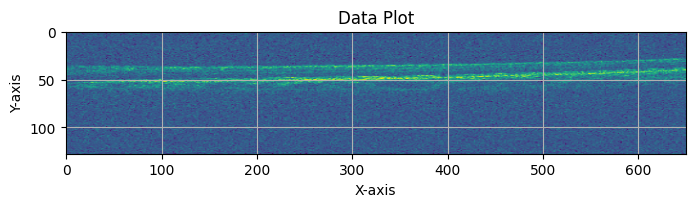

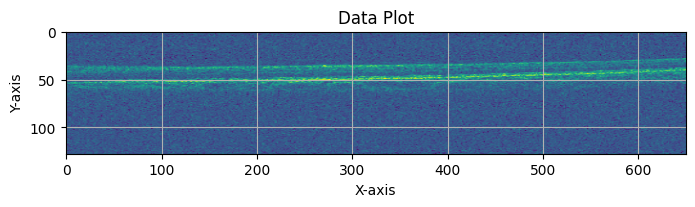

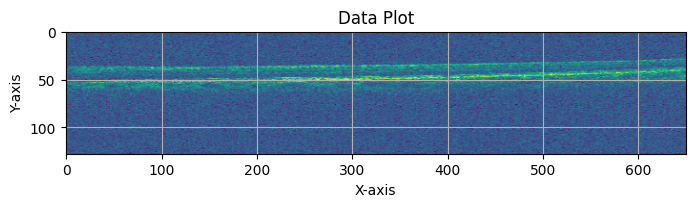

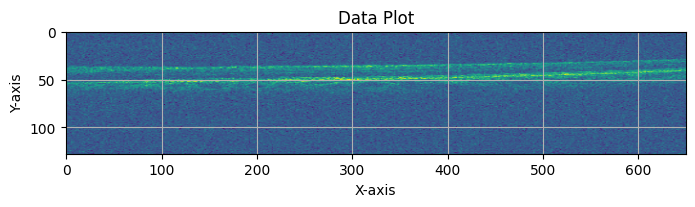

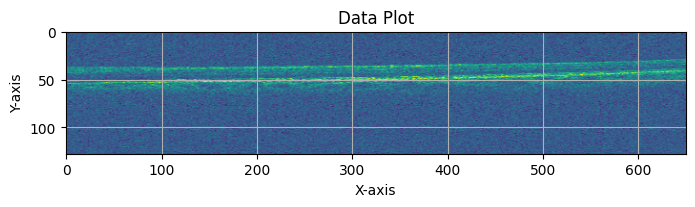

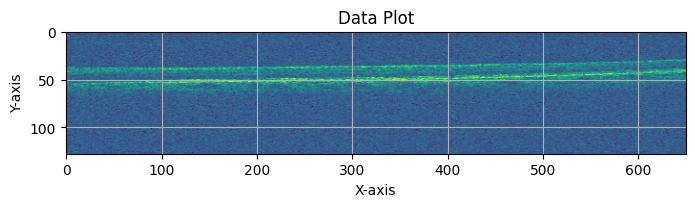

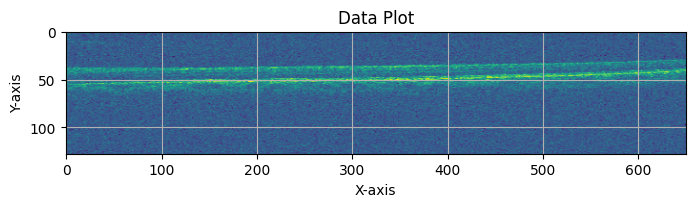

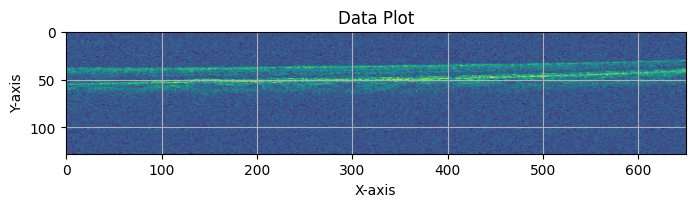

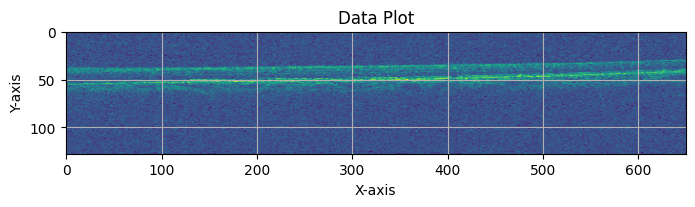

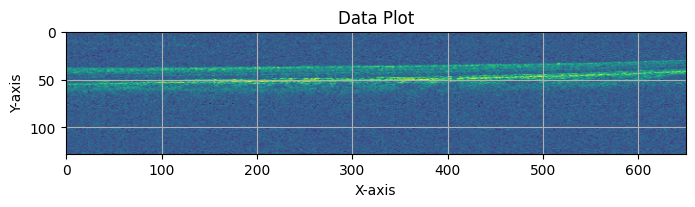

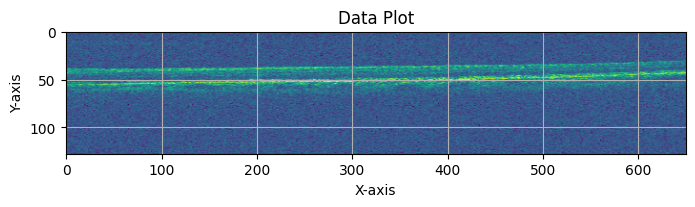

KeyboardInterrupt: 

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Access the variable 'data' from the loaded .mat file
data_array = data['d5']# [:,:,0]

img_file = data_array # .reshape((650, 128, 512)).T
            
bscan_slices = []


ascans = 650
depth = 512
bscans = 128


for i, bscan_slice in enumerate(np.rollaxis(img_file, 2)):
    # ========== 2 ==========

    # transform each bscan
    #bscan_slice = np.rot90(bscan_slice) # Rotating image 90 deg CCW
    #bscan_slice = np.fliplr(bscan_slice) # Flipping image horizontally

    #print(mode["dst_depth_px"])
    #print(mode["ascan"])

    bscan_slice = cv2.resize(bscan_slice, (ascans, bscans)) # Resizing image
    
    
    plt.figure(figsize=(8, 6))
    plt.imshow(bscan_slice)
    plt.title('Data Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()
    
    
    # append bscans or SAVE IMAGE HERE (the slice)
    bscan_slices.append(bscan_slice)

# stack bscans
bscan_file = np.stack(bscan_slices, axis=0) 

enface_file = np.zeros(shape = (bscans, ascans), dtype = np.uint8) # todo was 500, 500 before ... a or b first?

# ========== 2 ==========
for i, bscan in enumerate(bscan_file):                  
    enfacedata = np.amax(bscan, axis=0) # Obtaining max value in each row and generating a n-by-1 matrix
    enface_file[i] = enfacedata # Appending enfacedata to the enface array

enface_file = cv2.resize(enface_file, (500, 500))
    
# Plot the data (adjust as needed)
plt.figure(figsize=(8, 6))
plt.imshow(enface_file, cmap="gray")
plt.title('Data Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


In [74]:
data['d5'].shape

(650, 512, 128)

In [35]:
380928 / 496 / 768 

1.0

In [3]:
from zipfile import ZipFile

with ZipFile('E:\Christina\dumpster\OCTA_3mm_part1.zip') as zf:
    # zf.extractall(pwd='dg')
    zf.extractall(pwd=b'sjed3_oww?3f')

NotImplementedError: That compression method is not supported